# IMPORT LIBRARIES

In [67]:
import pandas as pd
import numpy as np
import re
from thefuzz import process
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [68]:
# LOAD DATA
df=pd.read_csv('raw_data.csv')

In [69]:
# tampilkan 5 baris pertama
df.head()

,Car ID,Brand,Model,Year,Color,Mileage,Price,Location
0,1,Toyota,Camry,2018,White,45000.0,18000.0,Los Angeles
1,2,Honda,Civic,2019,NaN,35000.0,16000.0,New York
2,3,Ford,Focus,2017,Silver,NaN,14000.0,Chicago
3,4,Chevrolet,Cruze,2016,Red,NaN,12000.0,Miami
4,5,Hyundai,Elantra,2018,Black,40000.0,NaN,San Francisco


# DATA CLEANING
Merupakan proses identifikasi, deteksi, dan koreksi kesalahan atau ketidak akuratan yang terdapat dalam dataset. Tujuannya memastikan data bebas dari kesalahan.

## Tahapan Umum 

### 1. Pemahaman Data
memahami struktur data, pola, dan karakteristiknya

In [70]:
# melihat informasi umum
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Car ID    2200 non-null   int64 
 1   Brand     2200 non-null   object
 2   Model     2200 non-null   object
 3   Year      2200 non-null   object
 4   Color     1634 non-null   object
 5   Mileage   1754 non-null   object
 6   Price     1681 non-null   object
 7   Location  2200 non-null   object
dtypes: int64(1), object(7)
memory usage: 137.6+ KB


Terdapat total **8 kolom** dan **2200 baris index** dalam dataset ini, namun di beberapa kolom seperti **"Year", "Mileage", dan "Price"** memiliki tipe data *object* yang dimana ini tidak sesuai dengan dengan data yang ada (perlu diubah ke tipe data yang sesuai). Selain itu kita juga harus mencari kesalahan lainnya seperti missing value, outlier, duplicate, dll.

### 2. Penanganan Duplikasi
identifikasi dan menghapus data duplikat, memastikan data bersifat unik.

In [71]:
# menghitung duplicate data pada kolom unik
duplikat=df.duplicated(subset=['Car ID'])
jumlah_duplikat=duplikat.sum()
print('Jumlah Data Duplikat :', jumlah_duplikat)

Jumlah Data Duplikat : 200


bisa dilihat ada **200** nilai duplikat pada kolom **"Car ID"** dalam dataset.

In [72]:
# menghapus duplikat pada dataframe berdasarkan kolom unik "Car ID"
df_new=df.drop_duplicates(subset=['Car ID'])

In [73]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Car ID    2000 non-null   int64 
 1   Brand     2000 non-null   object
 2   Model     2000 non-null   object
 3   Year      2000 non-null   object
 4   Color     1500 non-null   object
 5   Mileage   1588 non-null   object
 6   Price     1537 non-null   object
 7   Location  2000 non-null   object
dtypes: int64(1), object(7)
memory usage: 140.6+ KB


sekarang dataframe sudah bebas dari nilai duplikat.

### 3. Deteksi Kesalahan
identifikasi dan penanganan kesalahan data, seperti **missing value, outlier, atau format yang tidak sesuai.** Melibatkan analisis statistik dan normalisasi.

#### Normalisasi Data
memastikan data konsisten dengan menyesuaikan format yang seragam, penulisan huruf besar atau kecil, dan standarisasi unit pengukuran.

In [74]:
# kolom "Year" harus di ubah ke tipe data integer 
# dan mengonversinya menjadi format yang konsisten

# menghitung jumlah karakter kolom "Year"
year_lengths=df_new.Year.str.len()
year_lengths.value_counts()

Year
4     1901
17      99
Name: count, dtype: int64

* **4** = jumlah karakter (contoh: '2016')
* **1901** = jumlah baris pada kolom **"Year"** yang punya panjang 4 karakter

* **17** = jumlah karakter (contoh: 'Two Thousand 2016')
* **99** = jumlah baris pada kolom **"Year"** yang punya 17 karakter

In [75]:
# melihat jumlah baris indeks
indeks=np.where([year_lengths==17])[1]
print('Indeks dengan Format yang TIDAK KONSISTEN :', indeks)
df_new.loc[indeks]

Indeks dengan Format yang TIDAK KONSISTEN : [  13   42   46   48   57   58   71   91   96  107  114  132  148  172
  186  197  205  227  239  255  260  269  276  293  298  311  327  337
  338  369  380  387  414  444  446  518  542  560  585  596  648  678
  680  703  707  724  761  775  782  833  893  953  958 1011 1043 1048
 1062 1083 1112 1118 1129 1219 1238 1255 1257 1318 1319 1343 1370 1388
 1400 1410 1465 1474 1489 1495 1507 1537 1554 1573 1594 1652 1661 1688
 1703 1704 1729 1780 1787 1829 1837 1848 1849 1878 1907 1914 1921 1924
 1927]


,Car ID,Brand,Model,Year,Color,Mileage,Price,Location
13,14,Chevrolet,Equinox,Two Thousand 2018,Black,NaN,NaN,Miami
42,43,Ford,Mustang,Two Thousand 2019,Blue,NaN,22000.0,Chicago
46,47,Honda,Civic,Two Thousand 2017,NaN,0.0,17000.0,Atlanta
48,49,Chevrolet,impala,Two Thousand 2019,NaN,NaN,18000.0,Houston
57,58,Ford,Explorer,Two Thousand 2018,Blue,45000.0,NaN,Phoenix
...,...,...,...,...,...,...,...,...
1907,1908,Hyundai,Sonata,Two Thousand 2020,Blue,55000.0,NaN,Seattle
1914,1915,Honda,Pilot,Two Thousand 2015,Gray,40000.0,17000.0,Atlanta
1921,1922,Chevrolet,Tahoe,Two Thousand 2015,Black,NaN,15000.0,Miami
1924,1925,HONDA,Fit,Two Thousand 2020,Gray,65000.0,NaN,Atlanta


bisa dilihat terdapat **99 baris indeks** yang memiliki 17 karakter pada kolom **"Year"**

In [76]:
# memperbaiki format yang tidak konsisten menggunakan Regex

#fungsi untuk mengekstrak angka dari teks
def extract_year(value):
    if isinstance(value, str): # jika nilai adalah string
        match=re.search(r'\d{4}',value) # cari angka 4 digit
        if match:
            return int(match.group(0)) # kembalikan angka yang ditemukan
            return None # jika tidak ada angka ditemukan

# terapkan fungsi ke kolom "Year"
df_new['Year']=df_new['Year'].apply(extract_year)

In [77]:
df_new[13:16]

,Car ID,Brand,Model,Year,Color,Mileage,Price,Location
13,14,Chevrolet,Equinox,2018,Black,NaN,NaN,Miami
14,15,Hyundai,kona,2019,NaN,35000.0,20000.0,San Francisco
15,16,Toyota,Highlander,2016,NaN,NaN,25000.0,Dallas


sekarang kolom **"Year"** sudah memiliki format integer dan sudah KONSISTEN.

sebelumnya kita sudah melakukan normalisasi dengan memperbaiki konsistensi data dari kolom **"Year"**, selanjutnya kita akan memperbaiki penulisan dari kolom **"Brand" dan "Model"**.

In [78]:
# daftar merek/brand yang benar
correct_brands=['Toyota','Honda','Ford','Chevrolet','Hyundai']

# fungsi thefuzz untuk mencocokkan dan menormalisasi nama brand
def normalize_brand(Brand):
    match, score=process.extractOne(Brand, correct_brands) # mencari brand terdekat
    return match if score >= 50 else "Unknown" # gunakan threshold kemiripan 50%

# terapkan fungsi ke kolom "Brand"
df_new['Brand']=df_new['Brand'].apply(normalize_brand)

In [79]:
df_new[53:70]

,Car ID,Brand,Model,Year,Color,Mileage,Price,Location
53,54,Chevrolet,Equinox,2020,Black,NaN,24000.0,Miami
54,55,Hyundai,Tucson,2015,NaN,70000.0,$20000.0,San Francisco
55,56,Toyota,Rav4,2016,Gray,NaN,22000.0,Dallas
56,57,Honda,Pilot,2017,White,50000.0,NaN,Atlanta
57,58,Ford,Explorer,2018,Blue,45000.0,NaN,Phoenix
58,59,Chevrolet,Traverse,2019,Black,NaN,NaN,Houston
59,60,Hyundai,Santa Fe,2020,Red,35000.0,25000.0,Seattle
60,61,Toyota,4Runner,2015,Silver,NaN,28000.0,Los Angeles
61,62,Honda,Odyssey,2016,White,55000.0,22000.0,New York
62,63,Ford,edge,2017,NaN,nan miles,NaN,Chicago


selanjutnya kita akan menormalisasi penulisan pada kolom "Model"

In [80]:
# mengganti simbol "@" dengan karakter "a"
df_new['Model']=df_new['Model'].str.replace(r'@','a',regex=True)

In [81]:
df_new[50:54]

,Car ID,Brand,Model,Year,Color,Mileage,Price,Location
50,51,Toyota,Corolla,2017,NaN,55000.0,19000.0,Los Angeles
51,52,Honda,CR-V,2018,White,NaN,23000.0,New York
52,53,Ford,Escape,2019,Blue,40000.0 km,21000.0,Chicago
53,54,Chevrolet,Equinox,2020,Black,NaN,24000.0,Miami


#### format data

In [82]:
# mengkonversi tipe data pada kolom "Mileage" dan "Price"

# menghapus teks (miles / km)
df_new['Mileage']=df_new['Mileage'].replace({' miles': '', ' km': ''},
                                                                  regex=True).astype(float)

# menghapus simbol ($)
df_new['Price']=df_new['Price'].str.replace('$', '').astype(float)

In [83]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Car ID    2000 non-null   int64  
 1   Brand     2000 non-null   object 
 2   Model     2000 non-null   object 
 3   Year      2000 non-null   int64  
 4   Color     1500 non-null   object 
 5   Mileage   1508 non-null   float64
 6   Price     1513 non-null   float64
 7   Location  2000 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 205.2+ KB


semua format data sudah sesuai.

#### missing value (nilai hilang)
penyebab nilai hilang :
* kesalahan input data (operator lupa memasukkan nilai tertentu)
* data yang tidak relevan (data memang seharusnya tidak ada)

In [84]:
# melihat jumlah missing value di setiap kolom
nilai_hilang=df_new.isnull().sum()
print(nilai_hilang)

Car ID        0
Brand         0
Model         0
Year          0
Color       500
Mileage     492
Price       487
Location      0
dtype: int64


bisa dilihat bahwa kolom **"Color", "Mileage", dan "Price"** terdapat missing value.

In [85]:
# sekarang kita lihat ada berapa persen sih jumlah nilai hilang pada dataset ini

# menghitung total missing value
jumlah_cell=np.prod(df_new.shape)
jumlah_hilang=nilai_hilang.sum()

# menghitung persentase missing value
persentase_hilang=(jumlah_hilang/jumlah_cell)*100
print("Missing Value Percentage : ", persentase_hilang)

Missing Value Percentage :  9.24375


terdapat **9.24%** nilai hilang dari dalam dataset 

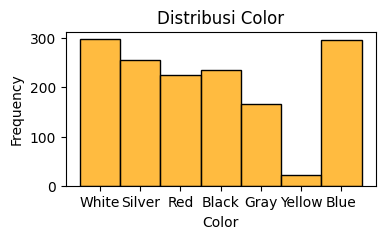

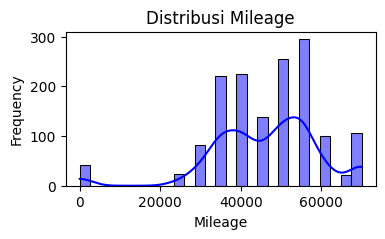

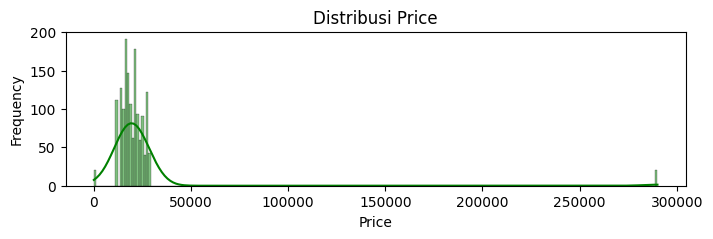

In [86]:
# kita akan mengatasi nilang hilang ini dengan imputasi data
# sebelum itu, kita lihat dulu distribusi data-nya

# distribusi data

# Visualisasi distribusi Color
plt.figure(figsize=(4, 2))
sns.histplot(df_new['Color'], kde=False, bins=20, color='orange')
plt.title('Distribusi Color')
plt.xlabel('Color')
plt.ylabel('Frequency')
plt.show()

# Visualisasi distribusi Mileage
plt.figure(figsize=(4, 2))
sns.histplot(df_new['Mileage'], kde=True, color='blue')
plt.title('Distribusi Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

# Visualisasi distribusi Price
plt.figure(figsize=(8, 2))
sns.histplot(df_new['Price'], kde=True, color='green')
plt.title('Distribusi Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [87]:
# melakukan imputasi

# mengisi missing value dengan MODE pada kolom "Color"
mode_color=df_new['Color'].mode()[0]
df_new['Color'].fillna(mode_color, inplace=True)

# mengisi missing value dengan MEDIAN pada kolom "Mileage"
median_mileage=df_new['Mileage'].median()
df_new['Mileage'].fillna(median_mileage, inplace=True)

# mengisi missing value dengan median
median_price=df_new['Price'].median()
df_new['Price'].fillna(median_price, inplace=True)
# membatasi jumlah desimal menjadi 1
df_new['Price']=df_new['Price'].round(1)

In [88]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Car ID    2000 non-null   int64  
 1   Brand     2000 non-null   object 
 2   Model     2000 non-null   object 
 3   Year      2000 non-null   int64  
 4   Color     2000 non-null   object 
 5   Mileage   2000 non-null   float64
 6   Price     2000 non-null   float64
 7   Location  2000 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 205.2+ KB


#### outlier

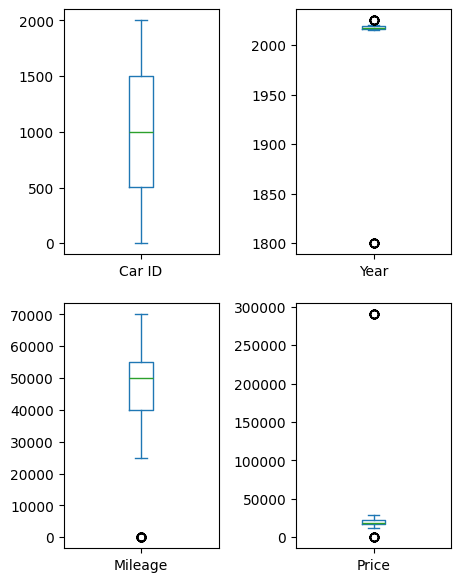

In [90]:
# melihat outlier dengan visualisasi data

# memilih kolom numerik untuk mencari outlier
df_to_plot = df_new.select_dtypes(include=['float','int'])

# memplotting dengan boxplot
df_to_plot.plot(subplots=True, layout=(2,2), kind='box', figsize=(5,7))
plt.subplots_adjust(wspace=0.5);

Mengatasi outlier tanpa menghapus-nya, dengan menentukan IQR, Lower/Upper Bound, dan Capping Outlier

In [91]:
# menghitung kuartil untuk setiap kolom

# menghitung kuartil pada kolom "Mileage"
Q1_Mileage=df_new['Mileage'].quantile(0.25)
Q2_Mileage=df_new['Mileage'].quantile(0.50)
Q3_Mileage=df_new['Mileage'].quantile(0.75)

# menghitung kuatil pada kolom "Price"
Q1_Price=df_new['Price'].quantile(0.25)
Q2_Price=df_new['Price'].quantile(0.50)
Q3_Price=df_new['Price'].quantile(0.75)

# menghitung kuartil pada kolom "Year"
Q1_Year=df_new['Year'].quantile(0.25)
Q2_Year=df_new['Year'].quantile(0.50)
Q3_Year=df_new['Year'].quantile(0.75)

print(f'Q1 (Mileage): {Q1_Mileage}, Q2 (Median Mileage): {Q2_Mileage}, Q3 (Mileage): {Q3_Mileage}')
print(f'Q1 (Price): {Q1_Price}, Q2 (Median Price): {Q2_Price}, Q3 (Price): {Q3_Price}')
print(f'Q1 (Year): {Q1_Year}, Q2 (Median Year): {Q2_Year}, Q3 (Year): {Q3_Year}')

Q1 (Mileage): 40000.0, Q2 (Median Mileage): 50000.0, Q3 (Mileage): 55000.0
Q1 (Price): 17000.0, Q2 (Median Price): 19000.0, Q3 (Price): 22000.0
Q1 (Year): 2016.0, Q2 (Median Year): 2017.0, Q3 (Year): 2019.0


In [93]:
# menghitung interquartile range disetiap kolom

# menghitung IQR pada kolom "Mileage"
IQR_Mileage=Q3_Mileage-Q1_Mileage

# menghitung IQR pada kolo "Price" dan membatasi desimal menjadi 1 angka
IQR_Price=round(Q3_Price-Q1_Price,1)

# menghitung IQR pada kolom "Year"
IQR_Year=Q3_Year-Q1_Year

print(f'IQR (Mileage): {IQR_Mileage}')
print(f'IQR (Price): {IQR_Price}')
print(f'IQR (Year): {IQR_Year}')

IQR (Mileage): 15000.0
IQR (Price): 5000.0
IQR (Year): 3.0


In [94]:
# menghitung batas bawah dan batas atas (diluar jangkauan tersebut dianggap outlier)

# menghitung batas bawah dan atas pada kolom "Mileage"
Lower_Bound_Mileage=Q1_Mileage-1.5*IQR_Mileage
Upper_Bound_Mileage=Q3_Mileage+1.5*IQR_Mileage

# menghitung batas bawah dan atas pada kolom "Price"
Lower_Bound_Price=Q1_Price-1.5*IQR_Price
Upper_Bound_Price=Q3_Price+1.5*IQR_Price

# menghitung batas bawah dan atas pada kolom "Year_Cleaned"
Lower_Bound_Year=Q1_Year-1.5*IQR_Year
Upper_Bound_Year=Q3_Year+1.5*IQR_Year

In [95]:
# mencari outlier pada kolom "Mileage"
df_new[(df_new['Mileage']<Lower_Bound_Mileage)|(df_new['Mileage']>Upper_Bound_Mileage)]

# mencari outlier pada kolom "Price"
df_new[(df_new['Price']<Lower_Bound_Price)|(df_new['Price']>Upper_Bound_Price)]

# mencari outlier pada kolom "Year_Cleaned"
df_new[(df_new['Year']<Lower_Bound_Year)|(df_new['Year']>Upper_Bound_Year)]


,Car ID,Brand,Model,Year,Color,Mileage,Price,Location
17,18,Ford,Explorer,1800,White,50000.0,23000.0,Phoenix
81,82,Chevrolet,Impala,2025,Black,55000.0,19000.0,Houston
200,201,Hyundai,tucson,1800,Red,40000.0,19000.0,San Francisco
254,255,Toyota,Prius,2025,Gray,50000.0,19000.0,Dallas
326,327,Hyundai,Accent,1800,Silver,40000.0,19000.0,San Francisco
336,337,Hyundai,Genesis,1800,Black,40000.0,21000.0,San Francisco
349,350,Ford,Explorer,2025,White,35000.0,27000.0,Phoenix
402,403,Ford,Fiesta,1800,Blue,50000.0,16000.0,Phoenix
460,461,Ford,Edge,1800,White,70000.0,19000.0,Chicago
534,535,Chevrolet,Tahoe,1800,Black,40000.0,14000.0,Miami


In [96]:
# handle outlier dengan capping disetiap kolom

# mengganti outlier dengan nilai lower/upper bound pada kolom "Mileage"
df_new['Mileage']=np.where(df_new['Mileage']>Upper_Bound_Mileage,Upper_Bound_Mileage,
                                      np.where(df_new['Mileage']<Lower_Bound_Mileage,Lower_Bound_Mileage,df_new['Mileage']))

# mengganti outlier dengan nilai lower/upper bound pada kolom "Price"
df_new['Price']=np.where(df_new['Price']>Upper_Bound_Price,Upper_Bound_Price,
                                      np.where(df_new['Price']<Lower_Bound_Price,Lower_Bound_Price,df_new['Price']))

# mengganti outlier dengan nilai lower/upper bound pada kolom "Year_Cleaned"
df_new['Year']=np.where(df_new['Year']>Upper_Bound_Year,Upper_Bound_Year,
                                      np.where(df_new['Year']<Lower_Bound_Year,Lower_Bound_Year,df_new['Year']))


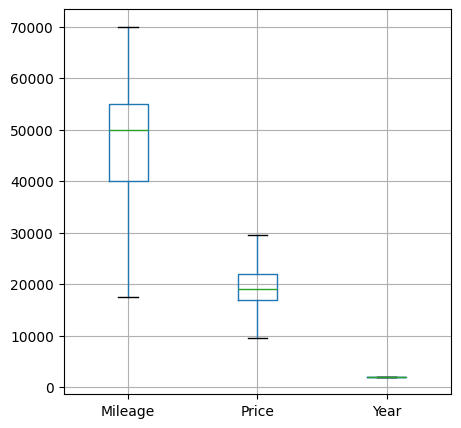

In [97]:
plt.figure(figsize=(5,5))
df_new.boxplot(column=['Mileage','Price','Year'])
plt.show()

In [98]:
df_new.tail()

,Car ID,Brand,Model,Year,Color,Mileage,Price,Location
1995,1996,Hyundai,Palisade,2019.0,Silver,65000.0,22000.0,San Francisco
1996,1997,Toyota,sienna,2018.0,Red,55000.0,16000.0,Dallas
1997,1998,Honda,Fit,2018.0,Gray,50000.0,14000.0,Atlanta
1998,1999,Ford,Fusion,2017.0,White,55000.0,19000.0,Phoenix
1999,2000,Chevrolet,malibu,2016.0,White,30000.0,23000.0,Houston


In [99]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Car ID    2000 non-null   int64  
 1   Brand     2000 non-null   object 
 2   Model     2000 non-null   object 
 3   Year      2000 non-null   float64
 4   Color     2000 non-null   object 
 5   Mileage   2000 non-null   float64
 6   Price     2000 non-null   float64
 7   Location  2000 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 205.2+ KB


In [46]:
df_new.to_csv('clean_data.csv',index=False)